In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('mainset2.csv')
display(df.head())
df.shape

,nba_game_date,nba_season_id,br_location,nba_gm_type,br_outcome,home_plus_minus,nba_game_id,nba_team_id,nba_team_abbreviation,nba_team_city,...,nba_tm_tov_pct,nba_efg_pct,nba_ts_pct,nba_usg_pct,nba_e_pace,nba_pace,nba_pace_per40,nba_poss,nba_pie,br_game_score
0,1999-11-02,21999,AWAY,Regular,W,-20,29900013,1610612757,POR,Portland,...,7.7,0.875,0.875,0.114,88.39,87.66,73.05,41.0,0.204,10.8
1,1999-11-02,21999,AWAY,Regular,W,-7,29900002,1610612754,IND,Indiana,...,0.0,0.286,0.342,0.225,103.06,103.57,86.31,36.0,-0.053,0.9
2,1999-11-02,21999,AWAY,Regular,W,-7,29900011,1610612747,LAL,Los Angeles,...,14.3,0.250,0.307,0.240,92.61,89.30,74.42,21.0,-0.017,1.2
3,1999-11-02,21999,HOME,Regular,L,-13,29900006,1610612761,TOR,Toronto,...,0.0,0.438,0.438,0.174,92.14,95.14,79.28,40.0,0.174,5.2
4,1999-11-02,21999,HOME,Regular,L,-13,29900006,1610612761,TOR,Toronto,...,14.3,0.143,0.415,0.197,94.95,96.55,80.46,55.0,0.005,2.6


(514704, 57)

In [3]:
column_check = ['pct', 'date', 'id', 'pace', 'rating', 'height',
               'tov', 'ratio', 'pie', 'score']

In [4]:
columns_to_adj = []

for col in df.columns:
    if df[col].dtype ==(float or int):
        
        if any(ext in col for ext in column_check):
            print(f'To be ignored for minute adjustment\t: {col}')
        else:
            columns_to_adj.append(col)
    else:
        print(f'Team/Player Data\t\t\t: {col}')
              
columns_to_adj

Team/Player Data			: nba_game_date
Team/Player Data			: nba_season_id
Team/Player Data			: br_location
Team/Player Data			: nba_gm_type
Team/Player Data			: br_outcome
Team/Player Data			: home_plus_minus
Team/Player Data			: nba_game_id
Team/Player Data			: nba_team_id
Team/Player Data			: nba_team_abbreviation
Team/Player Data			: nba_team_city
Team/Player Data			: nba_player_id
Team/Player Data			: nba_player_name
Team/Player Data			: nba_start_position
Team/Player Data			: nba_seconds
To be ignored for minute adjustment	: nba_fg_pct
To be ignored for minute adjustment	: nba_fg3_pct
To be ignored for minute adjustment	: nba_ft_pct
Team/Player Data			: birthdate
To be ignored for minute adjustment	: nba_height
To be ignored for minute adjustment	: nba_e_off_rating
To be ignored for minute adjustment	: nba_off_rating
To be ignored for minute adjustment	: nba_e_def_rating
To be ignored for minute adjustment	: nba_def_rating
To be ignored for minute adjustment	: nba_e_net_rating
To be i

['nba_fgm',
 'nba_fga',
 'nba_fg3m',
 'nba_fg3a',
 'nba_ftm',
 'nba_fta',
 'nba_oreb',
 'nba_dreb',
 'nba_reb',
 'nba_ast',
 'nba_stl',
 'nba_blk',
 'nba_to',
 'nba_pf',
 'nba_pts',
 'nba_plus_minus',
 'nba_poss']

### Non-adjusted data

In [5]:
df.describe()

,nba_season_id,home_plus_minus,nba_game_id,nba_team_id,nba_player_id,nba_seconds,nba_fgm,nba_fga,nba_fg_pct,nba_fg3m,...,nba_tm_tov_pct,nba_efg_pct,nba_ts_pct,nba_usg_pct,nba_e_pace,nba_pace,nba_pace_per40,nba_poss,nba_pie,br_game_score
count,514704.000000,514704.000000,5.147040e+05,5.147040e+05,5.147040e+05,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,...,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000
mean,23223.060380,3.322960,2.259101e+07,1.610613e+09,1.907960e+05,1506.540330,3.880628,8.562840,0.433226,0.745899,...,11.284780,0.473944,0.512408,0.186955,95.662365,95.506828,79.589026,49.733342,0.088189,7.941416
std,4775.528584,13.585443,5.158652e+06,8.621669e+00,4.081763e+05,621.222666,3.023453,5.618131,0.231544,1.189406,...,12.263072,0.255893,0.242160,0.074566,7.206232,7.198467,5.998713,20.430683,0.141829,7.169356
min,21999.000000,-58.000000,2.000000e+07,1.610613e+09,3.000000e+00,301.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,56.760000,60.180000,50.150000,7.000000,-13.000000,-11.700000
25%,22004.000000,-6.000000,2.050089e+07,1.610613e+09,1.749000e+03,1021.000000,2.000000,4.000000,0.308000,0.000000,...,0.000000,0.333000,0.379000,0.135000,90.790000,90.590000,75.490000,34.000000,0.036000,2.500000
50%,22010.000000,4.000000,2.110032e+07,1.610613e+09,2.735000e+03,1513.000000,3.000000,8.000000,0.444000,0.000000,...,9.100000,0.500000,0.515000,0.184000,95.330000,95.070000,79.230000,50.000000,0.091000,6.700000
75%,22015.000000,12.000000,2.160097e+07,1.610613e+09,2.019750e+05,2003.000000,6.000000,12.000000,0.571000,1.000000,...,16.700000,0.625000,0.658000,0.235000,100.210000,100.000000,83.330000,66.000000,0.145000,12.100000
max,42019.000000,61.000000,4.990009e+07,1.610613e+09,1.629760e+06,3898.000000,28.000000,50.000000,1.000000,14.000000,...,100.000000,1.500000,1.500000,0.643000,162.780000,163.530000,136.280000,122.000000,10.000000,63.500000


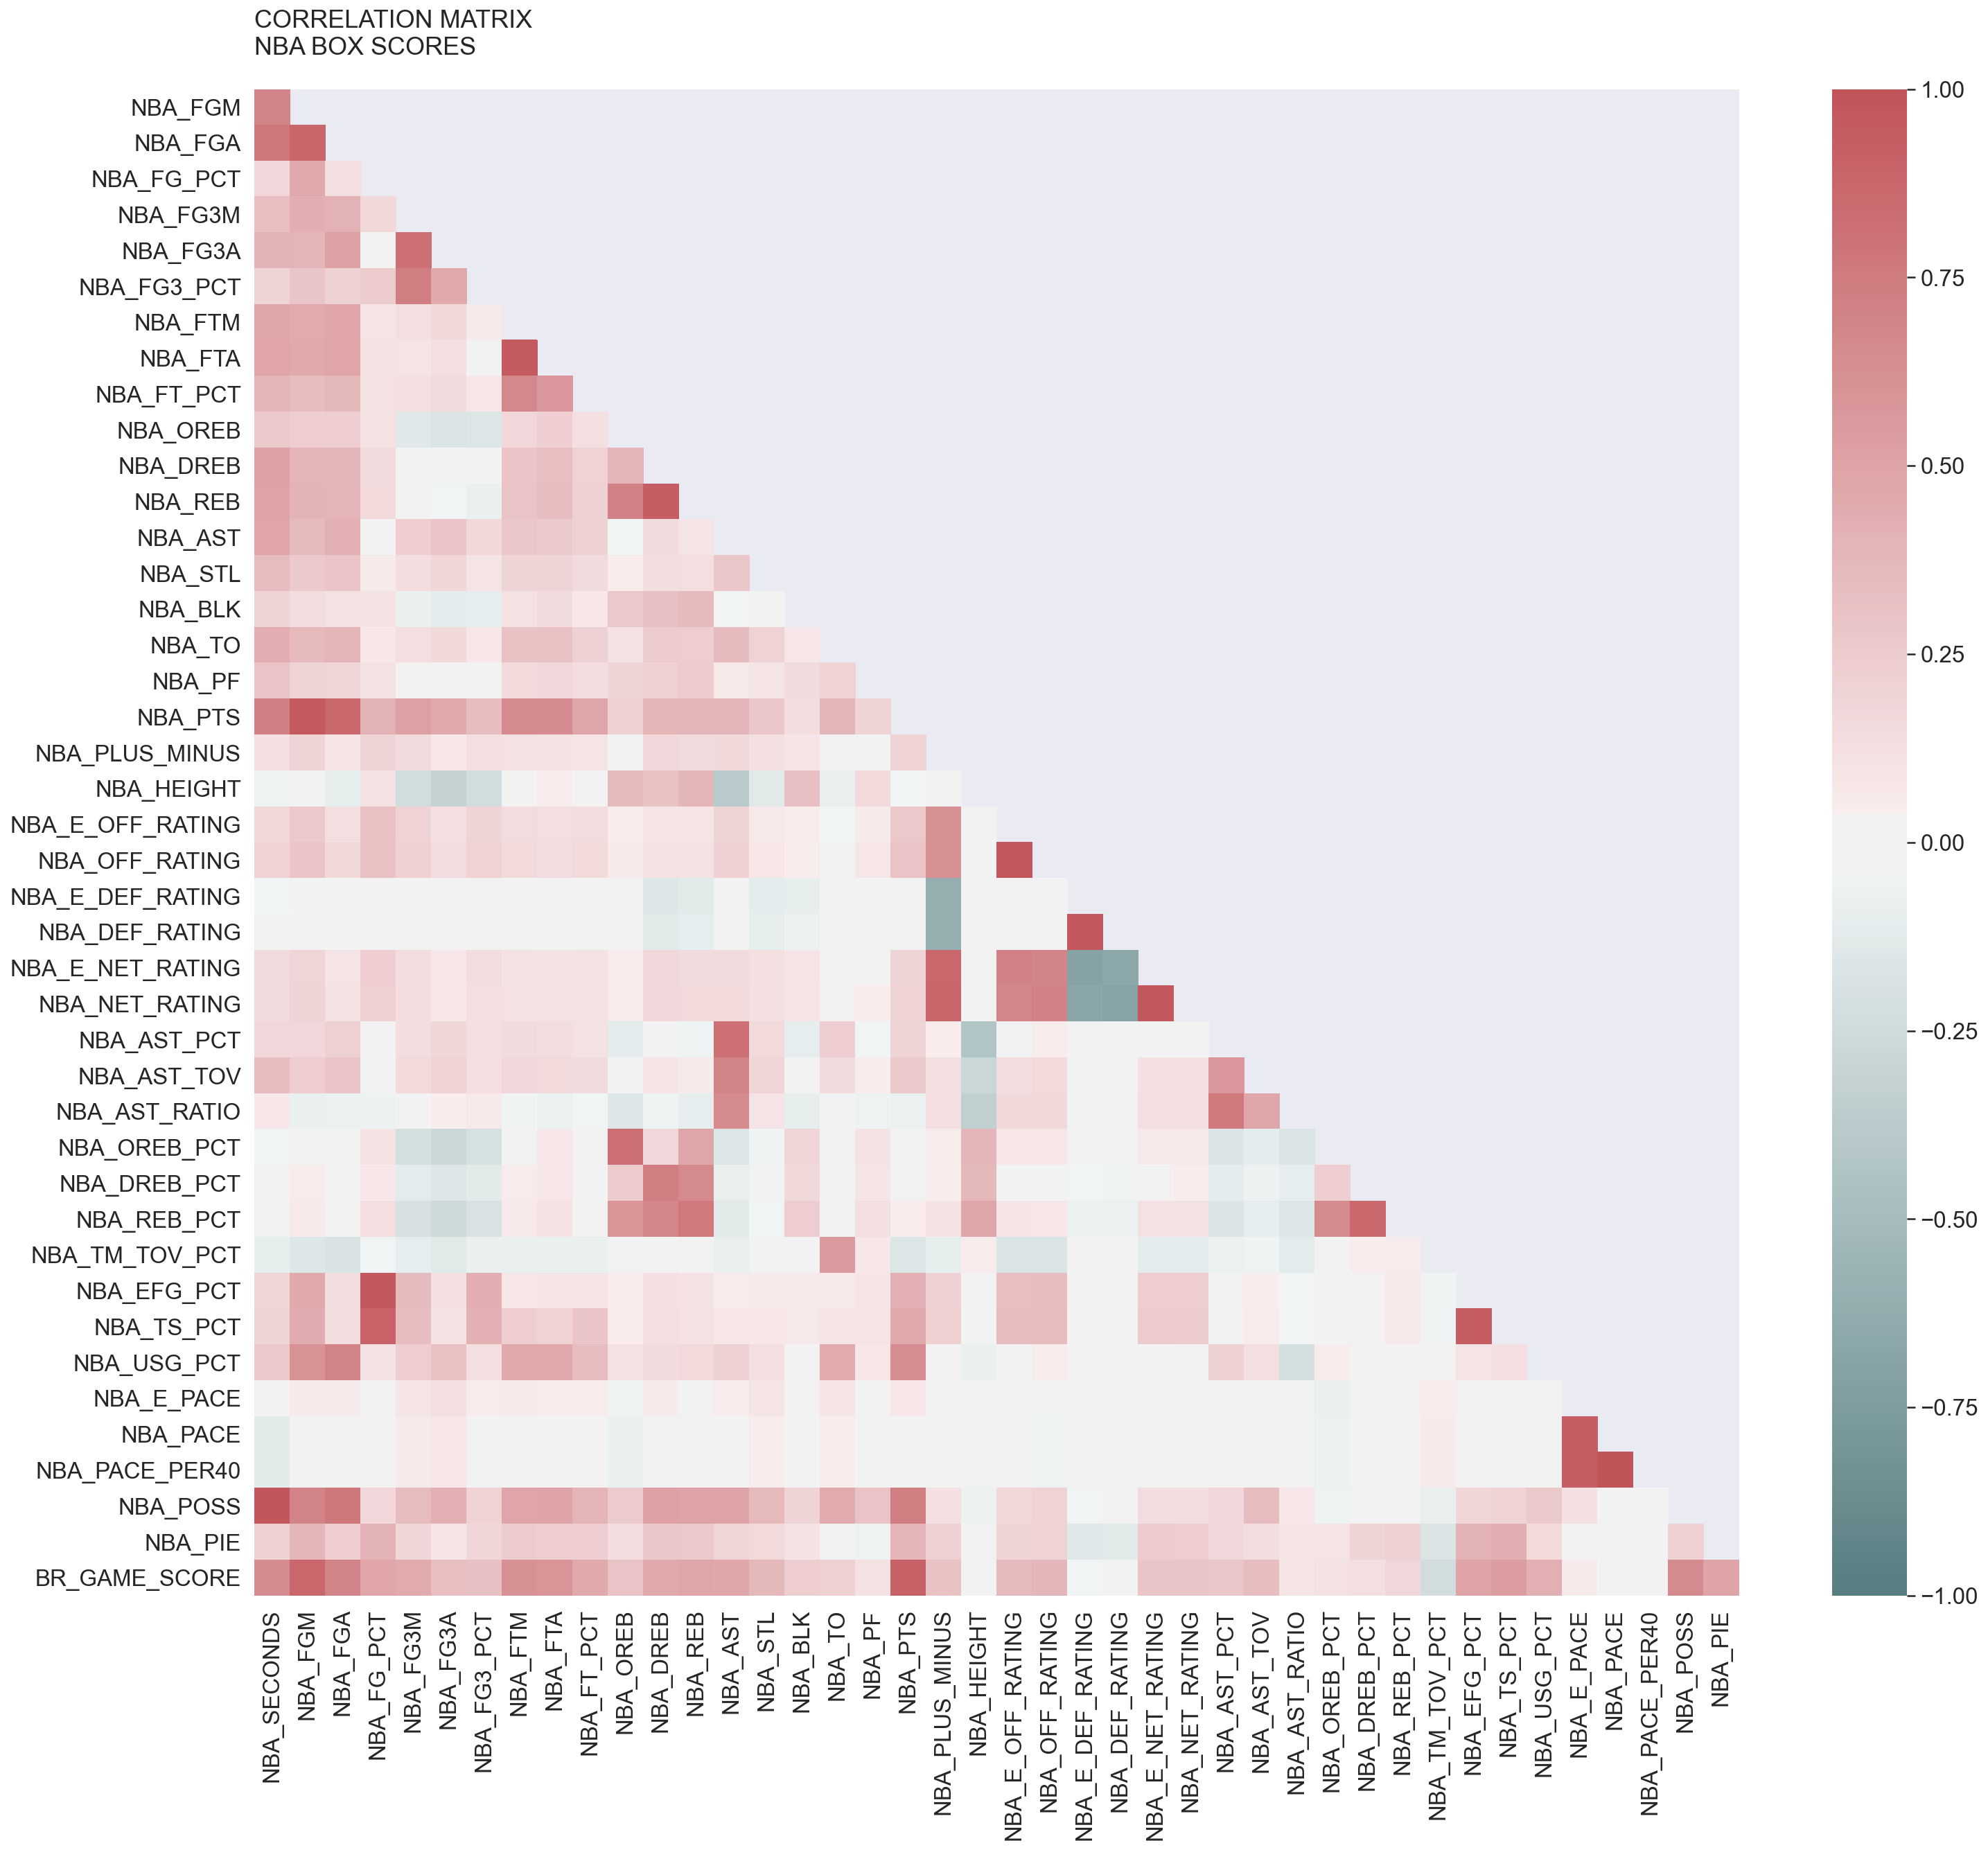

In [6]:
df_corr = df.loc[:,'nba_seconds':].corr()
fig, ax = plt.subplots(figsize=(24, 20))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(200, 10, 50, n=9, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nNBA BOX SCORES\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

### Adjusted data

In [7]:
for col in columns_to_adj:
    df[col] = (df[col] / (df.nba_seconds / 60))*40
df.describe()

,nba_season_id,home_plus_minus,nba_game_id,nba_team_id,nba_player_id,nba_seconds,nba_fgm,nba_fga,nba_fg_pct,nba_fg3m,...,nba_tm_tov_pct,nba_efg_pct,nba_ts_pct,nba_usg_pct,nba_e_pace,nba_pace,nba_pace_per40,nba_poss,nba_pie,br_game_score
count,514704.000000,514704.000000,5.147040e+05,5.147040e+05,5.147040e+05,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,...,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000,514704.000000
mean,23223.060380,3.322960,2.259101e+07,1.610613e+09,1.907960e+05,1506.540330,0.144268,0.326539,0.433226,0.027516,...,11.284780,0.473944,0.512408,0.186955,95.662365,95.506828,79.589026,1.988097,0.088189,7.941416
std,4775.528584,13.585443,5.158652e+06,8.621669e+00,4.081763e+05,621.222666,0.090347,0.145818,0.231544,0.043594,...,12.263072,0.255893,0.242160,0.074566,7.206232,7.198467,5.998713,0.154011,0.141829,7.169356
min,21999.000000,-58.000000,2.000000e+07,1.610613e+09,3.000000e+00,301.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,56.760000,60.180000,50.150000,1.233933,-13.000000,-11.700000
25%,22004.000000,-6.000000,2.050089e+07,1.610613e+09,1.749000e+03,1021.000000,0.080645,0.225322,0.308000,0.000000,...,0.000000,0.333000,0.379000,0.135000,90.790000,90.590000,75.490000,1.883981,0.036000,2.500000
50%,22010.000000,4.000000,2.110032e+07,1.610613e+09,2.735000e+03,1513.000000,0.139130,0.320856,0.444000,0.000000,...,9.100000,0.500000,0.515000,0.184000,95.330000,95.070000,79.230000,1.979381,0.091000,6.700000
75%,22015.000000,12.000000,2.160097e+07,1.610613e+09,2.019750e+05,2003.000000,0.200669,0.419874,0.571000,0.047244,...,16.700000,0.625000,0.658000,0.235000,100.210000,100.000000,83.330000,2.083333,0.145000,12.100000
max,42019.000000,61.000000,4.990009e+07,1.610613e+09,1.629760e+06,3898.000000,1.172638,1.315068,1.000000,0.652174,...,100.000000,1.500000,1.500000,0.643000,162.780000,163.530000,136.280000,3.406940,10.000000,63.500000


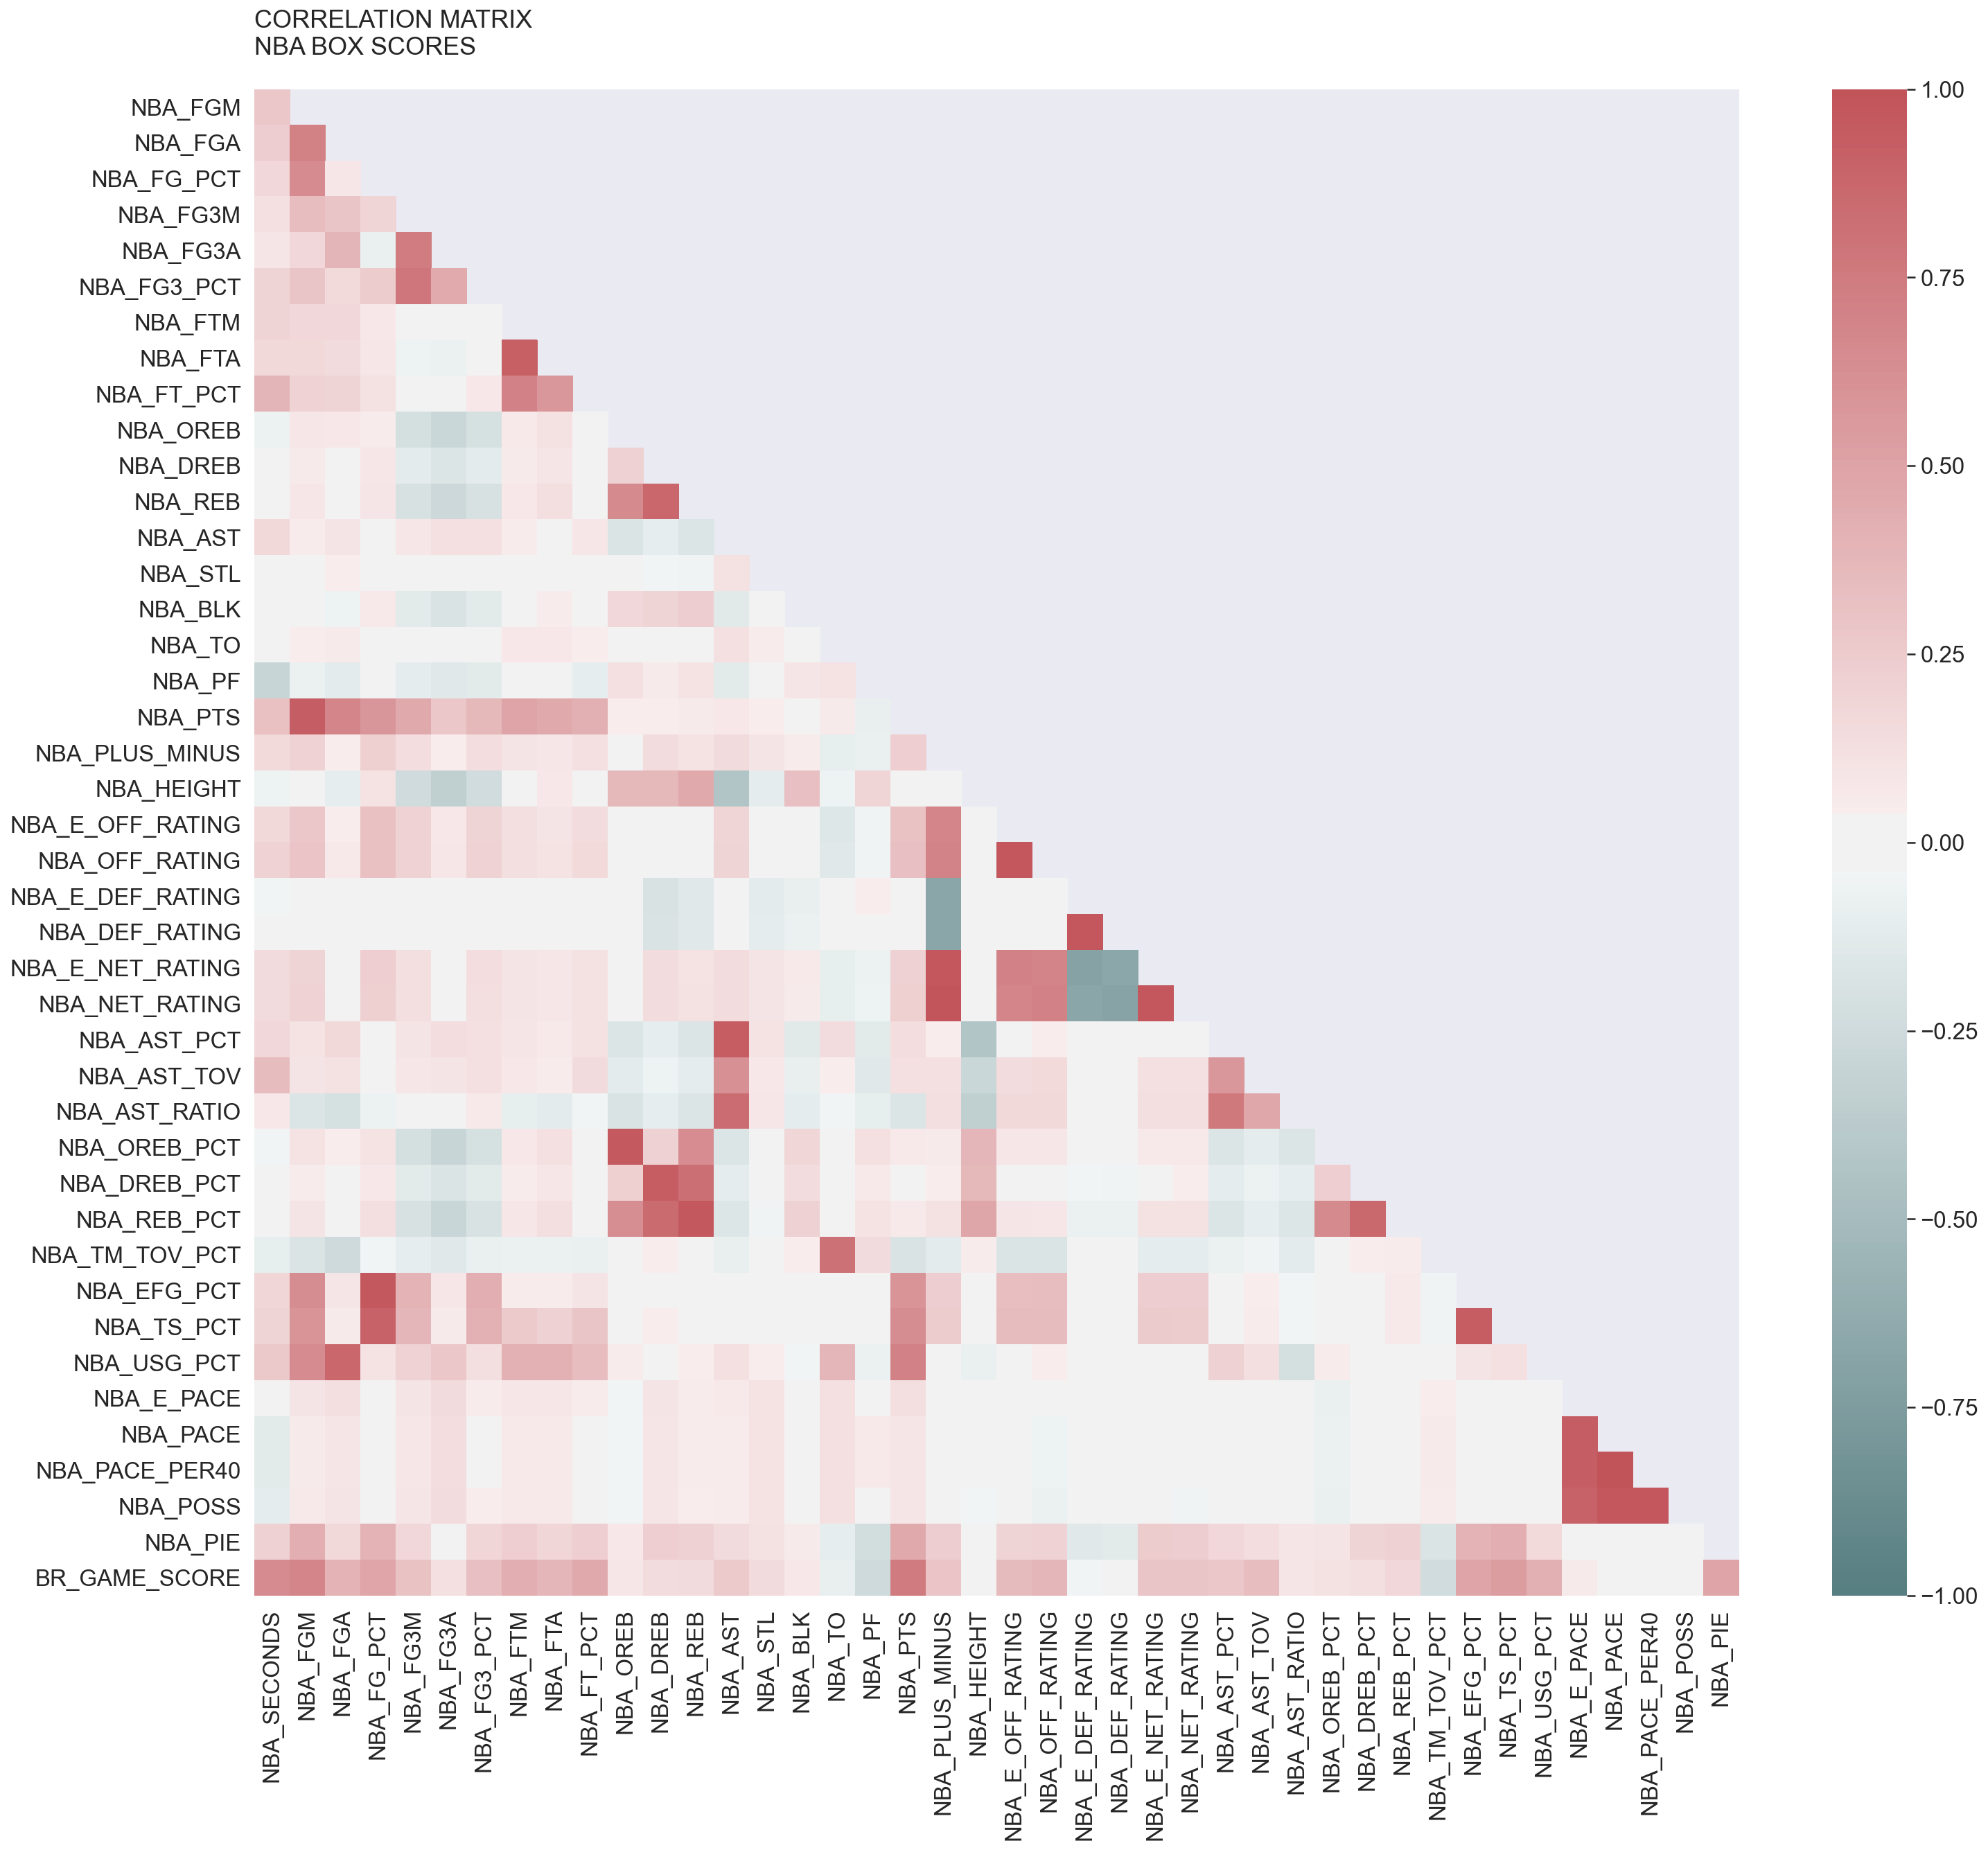

In [8]:
df_corr = df.loc[:,'nba_seconds':].corr()
fig, ax = plt.subplots(figsize=(24, 20))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(200, 10, 50, n=9, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nNBA BOX SCORES\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

In [9]:
# df.to_csv('minute_adjusted.csv', index=False)